 # Exercise 3 - Principal Component Analysis

### AIM:

To implement Principal component analysis and implementing the same using Scikit Learn.

### ALGORITHM:

1. Standardize the dataset.
2. Calculate the Covariance Matrix.
3. Calculate eigenvalues and eigenvectors of the covariance matrix.
4. Take the n eigenvectors with the highest eigenvalues as the eigenvector subset.
5. Project the dataset into lower dimension by transorming the dataset with the eigenveector subset.

## Program 1 - Implementation of PCA in Iris Data Set

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def pca(X, n):
    X_meaned = X - np.mean(X, axis=0)
    cov_mat = np.cov(X_meaned, rowvar=False)
    _, eigen_vectors = np.linalg.eigh(cov_mat)  # sorted in ascending order
    eigenvector_subset = eigen_vectors[:, :-n-1:-1] #take last n eigen vec
    return X_meaned @ eigenvector_subset

In [10]:
iris_df = pd.read_csv(
    "./datasets/iris.csv", 
    names = ["sepal length", "sepal width","petal length", "petal width","target"]
)
print('Iris Dataset contains 4 features column to determine the species Name')
print('Shape of the Iris Data:',iris_df.shape)
display(iris_df)

Iris Dataset contains 4 features column to determine the species Name
Shape of the Iris Data: (150, 5)


,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [11]:
X = iris_df.iloc[:,:-1].values
reduced_data = pca(X, 2)
reduced_df = pd.DataFrame(reduced_data, columns=['PC1', 'PC2'])
reduced_df["target"] = iris_df["target"]
print("After Feature Dimensional Reduction "
      "from 4 Features column Reduced into 2 PC")
display(reduced_df)

After Feature Dimensional Reduction from 4 Features column Reduced into 2 PC


,PC1,PC2,target
0,2.684207,0.326607,setosa
1,2.715391,-0.169557,setosa
2,2.889820,-0.137346,setosa
3,2.746437,-0.311124,setosa
4,2.728593,0.333925,setosa
...,...,...,...
145,-1.944017,0.187415,virginica
146,-1.525664,-0.375021,virginica
147,-1.764046,0.078519,virginica
148,-1.901629,0.115877,virginica


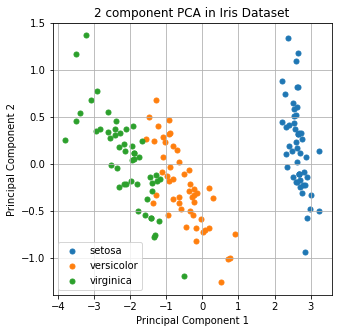

In [12]:
plt.figure(figsize=(5, 5))
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2 component PCA in Iris Dataset')
targets = reduced_df["target"].unique()
for target in targets:
    idxs = reduced_df['target'] == target
    plt.scatter(
        reduced_df.loc[idxs, 'PC1'],
        reduced_df.loc[idxs, 'PC2'],
        s=25,label = target
    )
plt.legend()
plt.grid()
plt.show()

## Program 2 - Implementation of PCA in Breast Cancer Dataset Using Scikit learn

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [7]:
cancer_data = load_breast_cancer()
cancer_df = pd.DataFrame(
    cancer_data.data, columns=cancer_data.feature_names)
cancer_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


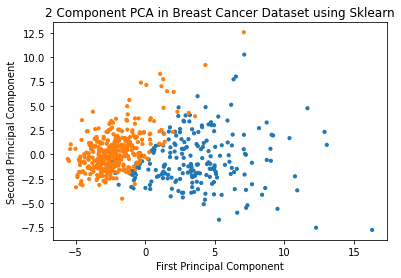

In [8]:
data_scaler = StandardScaler()
scaled_df = data_scaler.fit_transform(cancer_df)

pca = PCA(n_components=2)
reduced_df = pca.fit_transform(scaled_df)

plt.title("2 Component PCA in Breast Cancer Dataset using Sklearn")
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

colors = np.array(["C0","C1"])
plt.scatter(
    reduced_df[:, 0], reduced_df[:, 1],
    c=colors[cancer_data.target],
    s=10
)
plt.show()